In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import scipy.interpolate

In [3]:
n=10
t = np.linspace(0,1,n)
dt = (1-0)/(n-1)
w = (t-0.5)**2
w = w/(w.sum()*dt - w[0]*dt/2 - w[-1]*dt/2)
f = scipy.interpolate.interp1d(t, w, kind='nearest')
square = np.concatenate([np.zeros([1]), w[:1]*dt/2, w[0]*dt/2 + w[1:-1].cumsum()*dt, np.ones([1])])
grid = np.concatenate([np.zeros([1]), t[:-1] + dt/2, np.ones([1])])
F_inv = scipy.interpolate.interp1d(square, grid, kind='linear')

In [27]:
n=50
t0, t1 = 0.1, 0.9

t = np.linspace(t0,t1,n)
dt = (t1-t0)/(n-1)
p = (t-0.5)**2
p = p/((p[1:]+p[:-1])*dt/2).sum()
fp = scipy.interpolate.interp1d(t, p, kind='linear')
dpdt = scipy.interpolate.interp1d(t, np.concatenate([p[1:]-p[:-1], p[-1:]-p[-2:-1]])/dt, kind='zero')
intercept = lambda t: fp(t)-dpdt(t)*t
t0_interval = scipy.interpolate.interp1d(t, t, kind='zero')
mass = np.concatenate([np.zeros([1]), ((p[1:]+p[:-1])*dt/2).cumsum()[:-1], np.ones([1])])
F0_interval = scipy.interpolate.interp1d(t, mass, kind='zero')
F0_inv = scipy.interpolate.interp1d(mass, t, kind='zero')
def F(t):
    t0_ = t0_interval(t)
    F0_ = F0_interval(t)
    k, b = dpdt(t), intercept(t)
    output = 0.5*k*(t**2-t0_**2) + b*(t-t0_)
    return F0_ + output 

def F_inv(y):
    t0_ = F0_inv(y)
    F0_ = F0_interval(t0_)
    k, b = dpdt(t0_), intercept(t0_)
    c = y - F0_
    c = c + 0.5*k*t0_**2 + b*t0_
    D = np.sqrt(b**2 + 2*k*c)
    output = (-b + D) * (np.abs(k) > 0)  + c/b * (np.abs(k) == 0.0)
    output[np.abs(k) > 0] /= k[np.abs(k) > 0]
    return output

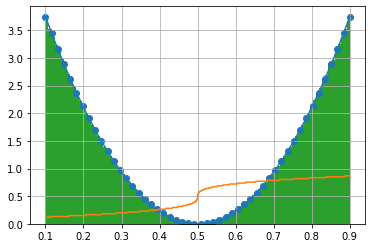

In [30]:
u = np.sqrt(2)*np.arange(12000) % 1

plt.plot(np.linspace(t0,t1,1000), fp(np.linspace(t0,t1,1000)))
plt.plot(np.linspace(t0,t1,1000), F0_inv(np.linspace(t0,t1,1000)))
plt.hist(F_inv(u), density=True, bins=100)
plt.scatter(t, p)
plt.grid()

In [31]:
F(np.array([t0])), F(np.array([t1]))

(array([0.]), array([1.]))

In [32]:
F_inv(np.array([0.0])), F_inv(np.array([1.0]))

(array([0.1]), array([0.9]))